In [31]:
import os
import numpy as np
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import cufflinks as cf
cf.set_config_file(theme='solar',sharing='public',offline=True) #List of Cufflinks Themes :  ['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']
import hvplot.pandas


## This notebook contains experimental code so may not make sense as we used this notebook to test code and packages

### What does the Australian GDP look like? Is AUS GDP similar for the same time-period (1995 - 2019) when using data acquired from ABS and the World Bank

In [32]:
#Load csv files
gdp_abs_df = pd.read_csv("../Data/ProcessedData/GDP_selected_countries_updated.csv")
gdp_abs_df = gdp_abs_df.rename(columns={'Unnamed: 0': "Year"})
gdp_abs_indexed_df = gdp_abs_df.set_index("Year")

gdp_world_df = pd.read_csv("../Data/ProcessedData/aud_vs_world_gdp.csv")
del gdp_world_df["Unnamed: 0"]
gdp_world_indexed_df = gdp_world_df.set_index("Year")
gdp_world_indexed_df.style.format("{:.1f}")
gdp_world_indexed_df

,AU,CA,CN,GB,IN,JP,KR,US
Year,,,,,,,,
1995,3.672164e+11,6.040116e+11,7.345479e+11,1.341682e+12,3.602820e+11,5.449118e+12,5.665834e+11,7.639749e+12
1996,4.003027e+11,6.285364e+11,8.637467e+11,1.415482e+12,3.928971e+11,4.833714e+12,6.101696e+11,8.073122e+12
1997,4.345680e+11,6.549879e+11,9.616040e+11,1.558110e+12,4.158678e+11,4.414734e+12,5.697545e+11,8.577554e+12
1998,3.988991e+11,6.339977e+11,1.029043e+12,1.651554e+12,4.213515e+11,4.032510e+12,3.833309e+11,9.062818e+12
1999,3.886082e+11,6.784100e+11,1.093997e+12,1.682292e+12,4.588204e+11,4.562079e+12,4.975127e+11,9.630664e+12
2000,4.152226e+11,7.446260e+11,1.211347e+12,1.658116e+12,4.683949e+11,4.887520e+12,5.761781e+11,1.025235e+13
2001,3.783761e+11,7.389627e+11,1.339396e+12,1.638763e+12,4.854410e+11,4.303543e+12,5.476582e+11,1.058182e+13
2002,3.946489e+11,7.601442e+11,1.470550e+12,1.780020e+12,5.149379e+11,4.115116e+12,6.272461e+11,1.093642e+13
2003,4.664881e+11,8.955953e+11,1.660288e+12,2.051011e+12,6.076993e+11,4.445659e+12,7.027173e+11,1.145824e+13


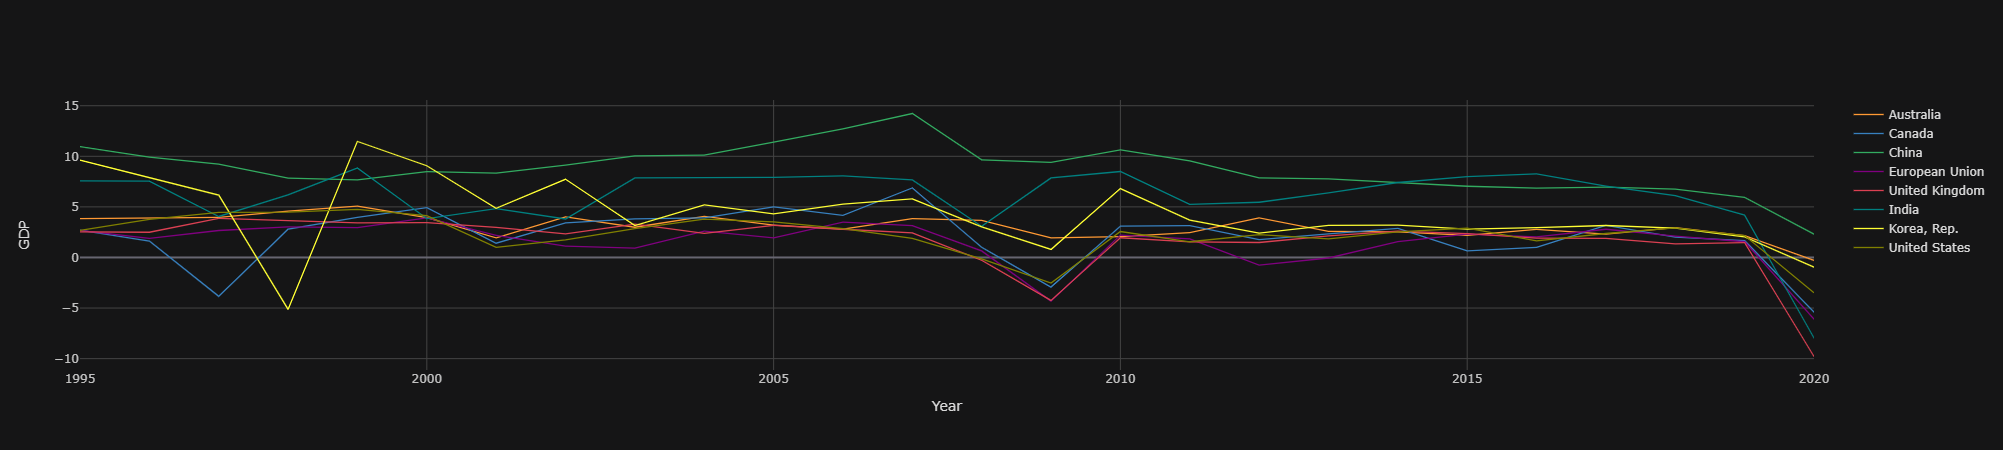

In [33]:
#Create line plots
gdp_plot = gdp_abs_indexed_df.iplot(kind='line',
                                    xTitle="Year",
                                    yTitle='GDP')

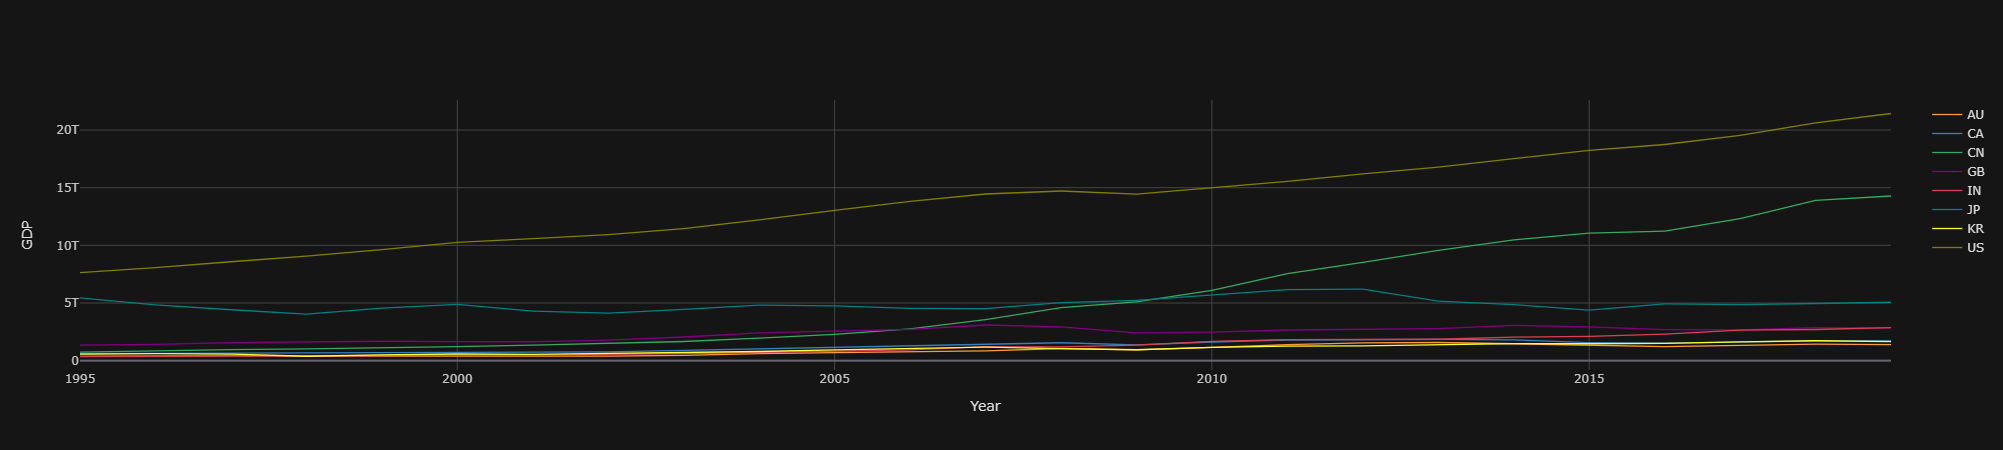

In [34]:
gdp_plot = gdp_world_indexed_df.iplot(kind='line',
                                    xTitle="Year",
                                    yTitle='GDP')

### Panel Visualisation Functions

In [35]:
def gdp_plot_all():
#     gdp_plot = gdp_abs_indexed_df.iplot(kind='line',
#                                         xTitle='Year',
#                                         yTitle='GDP')
    
    gdp_plot = gdp_world_indexed_df.hvplot.line()
    return gdp_plot

In [36]:
# Define panels
title = pn.pane.Markdown(
    """
    ## Analysis of the Australian Economy
    """
)

GDP = pn.Row(gdp_plot_all())

In [37]:
# Create dashboard
aus_economy = pn.Tabs(("Welcome", title),
                      ("GDP comparisons", GDP))
aus_economy

Tabs
    [0] Markdown(str)
    [1] Row
        [0] HoloViews(NdOverlay)

In [18]:
aus_economy.servable()

Tabs(active=1)
    [0] Markdown(str)
    [1] Row
        [0] HoloViews(NdOverlay)

In [72]:
employment_df = pd.read_csv("../Data/ProcessedData/Employment_JuneOnly.csv")

employment_df["Time"] = employment_df["Time"].replace('Jun-', ' ', regex=True)

employment_df["Time"] = employment_df["Time"].astype(int)

employment_new_df = employment_df.iloc[17:]

employment_new_df.head(20)

,Unnamed: 0,Time,TotalEmployed,TotalEmployed_M,TotalEmployed_F,Employment_To_Population_Ratio,Employment_To_Population_Ratio_M,Employment_To_Population_Ratio_F,TotalUnemployed,TotalUnemployed_M,TotalUnemployed_F,Population 15 and over,Population 15 and over_M,Population 15 and over_F
17,208,95,8205.6,4657.4,3548.3,58.3,67.3,49.6,723.5,434.2,289.3,14070.5,6922.5,7148.0
18,220,96,8311.7,4724.4,3587.3,58.2,67.3,49.5,723.8,424.3,299.5,14271.2,7017.8,7253.4
19,232,97,8345.6,4731.9,3613.6,57.7,66.6,49.1,735.2,427.5,307.7,14455.4,7101.7,7353.8
20,244,98,8516.8,4801.8,3715.0,58.2,66.8,49.9,702.8,419.9,282.9,14633.9,7186.3,7447.6
21,256,99,8673.2,4897.8,3775.5,58.5,67.3,50.0,600.6,348.6,252.0,14826.6,7277.7,7548.9
22,268,0,8922.0,4980.8,3941.2,59.3,67.5,51.5,564.3,327.3,237.0,15033.3,7377.1,7656.3
23,280,1,9021.9,4996.6,4025.3,59.1,66.7,51.8,651.5,374.4,277.1,15262.4,7486.6,7775.9
24,292,2,9180.8,5109.2,4071.6,59.3,67.2,51.7,619.7,348.2,271.5,15479.3,7598.1,7881.2
25,304,3,9370.4,5155.4,4215.0,59.7,66.9,52.7,587.6,330.9,256.6,15699.4,7706.7,7992.7
26,316,4,9543.3,5290.3,4253.0,60.0,67.7,52.5,537.3,294.0,243.3,15907.2,7812.6,8094.6


In [3]:
emp_males = employment_new_df[["TotalEmployed_M", "Time"]]#.set_index("Time")
emp_males
emp_females = employment_df[["TotalEmployed_F"]]

males = emp_males.hvplot.line(xlabel='Year',
                              ylabel='EmploymenRate',
                              line_color='red', legend=True,
                              width=1500)
males

:Curve   [index]   (TotalEmployed_M)

In [4]:
males = emp_males.hvplot.line(xlabel='Year', ylabel='EmploymenRate', line_color='red', legend=True)
females = emp_females.hvplot.line(xlabel='Year', ylabel='EmploymenRate',  line_color='blue')

comb = males * females
comb

:Overlay
   .Curve.I  :Curve   [index]   (TotalEmployed_M)
   .Curve.II :Curve   [index]   (TotalEmployed_F)

In [5]:
aud_exchange_df = pd.read_csv("../Data/RawData/AUDexchange.csv")
aud_exchange_time_list = aud_exchange_df[["Time"]]
#aud_exchange_time_list = aud_exchange_df["Time"].to_list()

In [6]:
del aud_exchange_df["Time"]

In [7]:
for column in aud_exchange_df.columns:
    aud_exchange_df[column] = aud_exchange_df[column]  / aud_exchange_df[column].abs().max()
      
# view normalized data
aud_exchange_df.head()

2021-07-02 19:57:55.152 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


,AUD_to_USD,AUD_to_EUR,AUD_to_GBP,AUD_to_JPY,AUD_to_CNY,AUD_to_KRW,AUD_to_CAD,AUD_to_INR
0,0.968009,0.989681,0.993660,0.993588,0.990821,0.941452,0.963232,0.855967
1,0.965415,0.984067,0.984750,0.987627,0.988759,0.942335,0.959212,0.851337
2,0.967762,0.989226,0.992975,0.992913,0.991501,0.943817,0.962839,0.853224
3,0.970479,0.987557,0.992289,0.997638,0.990198,0.944157,0.961761,0.853395
4,0.968626,0.989530,0.991090,0.998650,0.989751,0.946510,0.953623,0.851166


In [8]:
#aud_exchange_df.insert(0, "Time", aud_exchange_time_list)

In [9]:
aud_exchange_df.head()

,AUD_to_USD,AUD_to_EUR,AUD_to_GBP,AUD_to_JPY,AUD_to_CNY,AUD_to_KRW,AUD_to_CAD,AUD_to_INR
0,0.968009,0.989681,0.993660,0.993588,0.990821,0.941452,0.963232,0.855967
1,0.965415,0.984067,0.984750,0.987627,0.988759,0.942335,0.959212,0.851337
2,0.967762,0.989226,0.992975,0.992913,0.991501,0.943817,0.962839,0.853224
3,0.970479,0.987557,0.992289,0.997638,0.990198,0.944157,0.961761,0.853395
4,0.968626,0.989530,0.991090,0.998650,0.989751,0.946510,0.953623,0.851166


In [10]:
plot2 = aud_exchange_df.hvplot.line()
plot2

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [73]:
def plot_exchange_rates(dataframe):
    
    plot = dataframe.iplot(kind='line',
                           fill=True,
                           yTitle='ExchangeRates')
    return plot

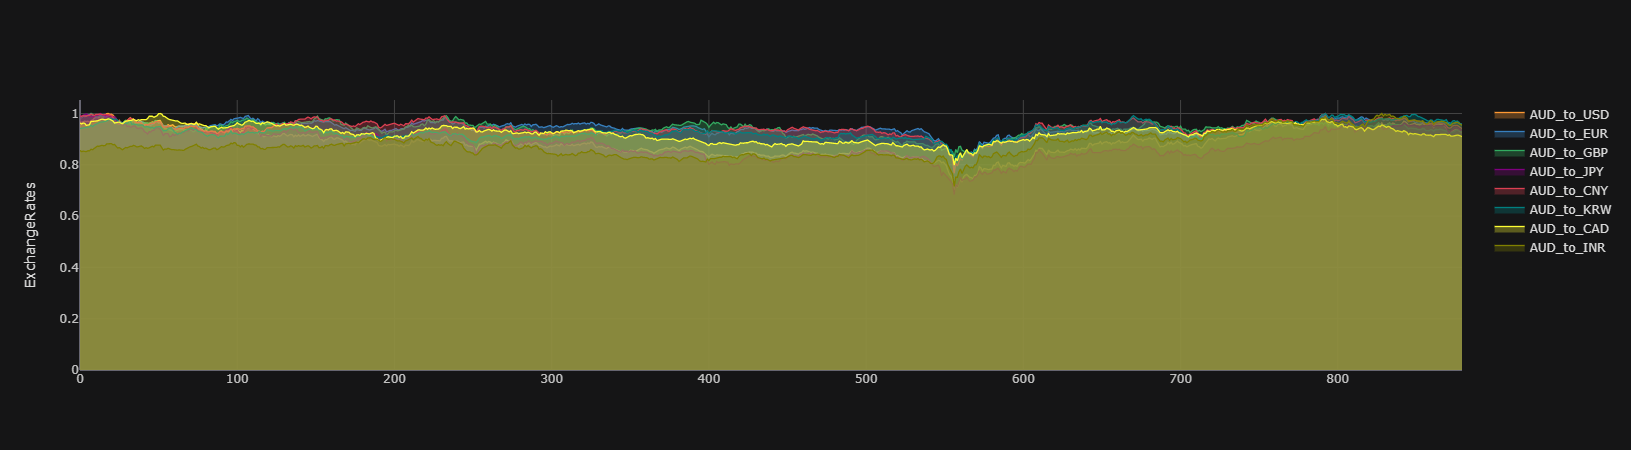

In [74]:
plot_exchange_rates(aud_exchange_df)

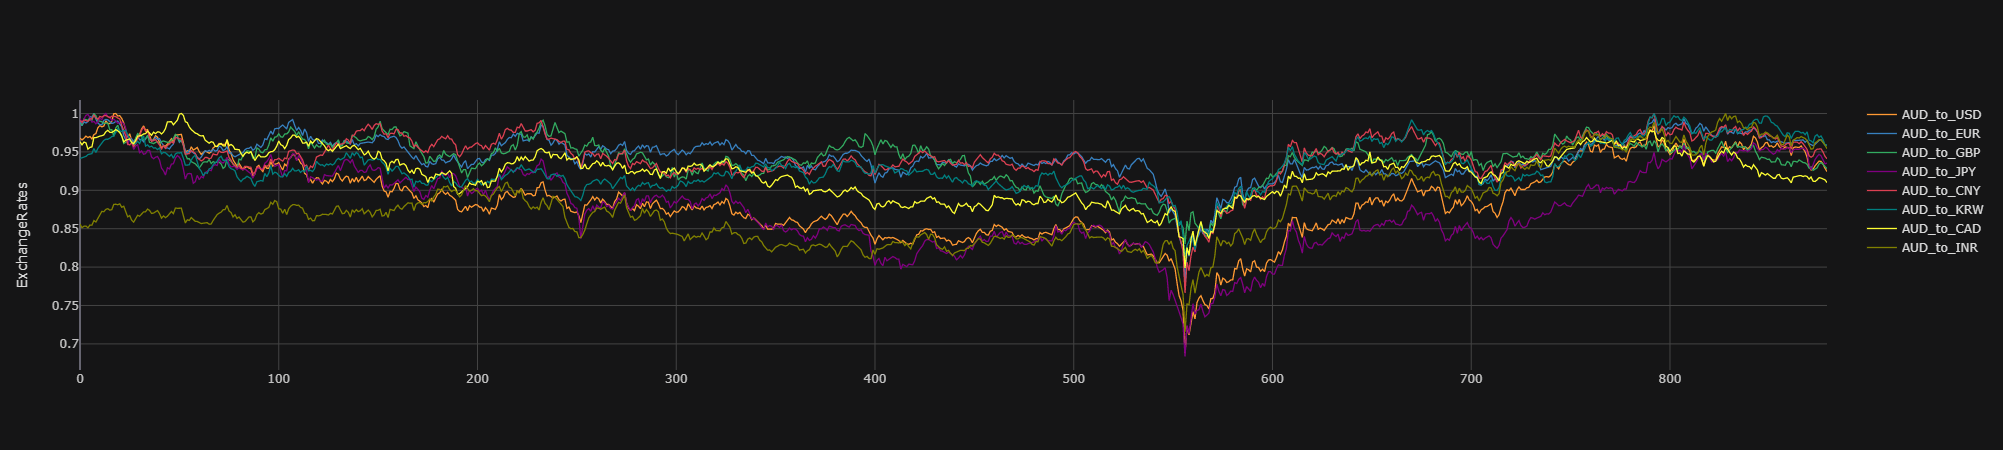

In [13]:
plot = aud_exchange_df.iplot(kind='line',
                             yTitle='ExchangeRates',
                             asFigure=True)
plot

In [88]:
aud_vs_world_gdp = pd.read_csv("../Data/ProcessedData/aud_vs_world_gdp.csv")
aud_vs_world_gdp_new = aud_vs_world_gdp.drop("Unnamed: 0", 1)

correlation = aud_vs_world_gdp_new.corr()

correlation


,AU_gdp,CA_gdp,CN_gdp,GB_gdp,IN_gdp,JP_gdp,KR_gdp,US_gdp
AU_gdp,1.000000,0.971807,0.904888,0.847820,0.922151,0.555315,0.931980,0.905649
CA_gdp,0.971807,1.000000,0.842330,0.925099,0.886164,0.546521,0.922743,0.902755
CN_gdp,0.904888,0.842330,1.000000,0.728590,0.987668,0.352852,0.955174,0.961908
GB_gdp,0.847820,0.925099,0.728590,1.000000,0.780361,0.293459,0.864634,0.856796
IN_gdp,0.922151,0.886164,0.987668,0.780361,1.000000,0.398157,0.973840,0.977127
JP_gdp,0.555315,0.546521,0.352852,0.293459,0.398157,1.000000,0.381186,0.313928
KR_gdp,0.931980,0.922743,0.955174,0.864634,0.973840,0.381186,1.000000,0.975428
US_gdp,0.905649,0.902755,0.961908,0.856796,0.977127,0.313928,0.975428,1.000000


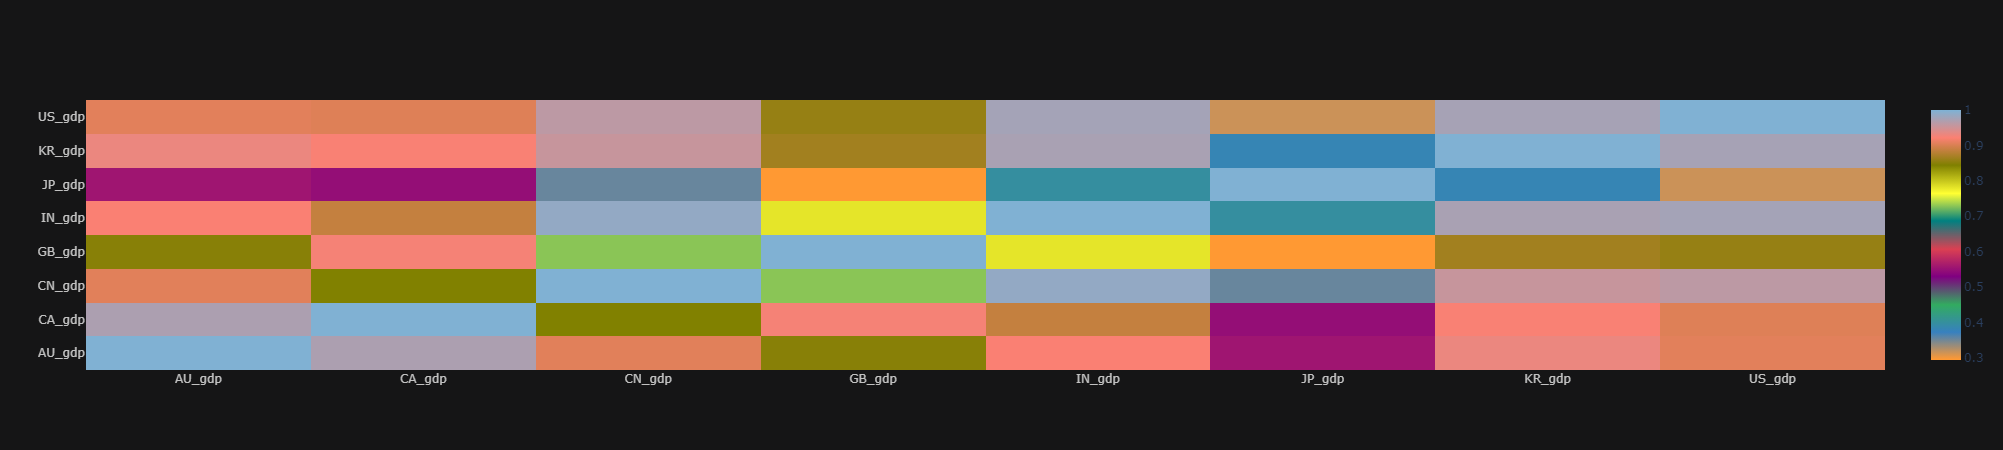

In [86]:
corrplot = correlation.iplot(kind='heatmap')
corrplot

In [87]:
heatmap_plot = correlation.hvplot.heatmap(ymarks_hover_color='cyan',
                                          hover_color='cyan',
                                          alpha=0.9,
                                          colorbar=True,
                                          cmap='bjy')

heatmap_plot

:HeatMap   [columns,index]   (value)

In [89]:
aud_vs_world_gdp

,Unnamed: 0,AU_gdp,CA_gdp,CN_gdp,GB_gdp,IN_gdp,JP_gdp,KR_gdp,US_gdp
0,0,3.672164e+11,6.040116e+11,7.345479e+11,1.341682e+12,3.602820e+11,5.449118e+12,5.665834e+11,7.639749e+12
1,1,4.003027e+11,6.285364e+11,8.637467e+11,1.415482e+12,3.928971e+11,4.833714e+12,6.101696e+11,8.073122e+12
2,2,4.345680e+11,6.549879e+11,9.616040e+11,1.558110e+12,4.158678e+11,4.414734e+12,5.697545e+11,8.577554e+12
3,3,3.988991e+11,6.339977e+11,1.029043e+12,1.651554e+12,4.213515e+11,4.032510e+12,3.833309e+11,9.062818e+12
4,4,3.886082e+11,6.784100e+11,1.093997e+12,1.682292e+12,4.588204e+11,4.562079e+12,4.975127e+11,9.630664e+12
5,5,4.152226e+11,7.446260e+11,1.211347e+12,1.658116e+12,4.683949e+11,4.887520e+12,5.761781e+11,1.025235e+13
6,6,3.783761e+11,7.389627e+11,1.339396e+12,1.638763e+12,4.854410e+11,4.303543e+12,5.476582e+11,1.058182e+13
7,7,3.946489e+11,7.601442e+11,1.470550e+12,1.780020e+12,5.149379e+11,4.115116e+12,6.272461e+11,1.093642e+13
8,8,4.664881e+11,8.955953e+11,1.660288e+12,2.051011e+12,6.076993e+11,4.445659e+12,7.027173e+11,1.145824e+13
9,9,6.124904e+11,1.026468e+12,1.955347e+12,2.412133e+12,7.091485e+11,4.815168e+12,7.931750e+11,1.221373e+13


In [92]:
list_new = [1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1]
len(list_new)

24

In [100]:
aud_vs_world_gdp["Year"] = list_new

ValueError: Length of values does not match length of index

In [99]:
aud_vs_world_gdp_new

,AU_gdp,CA_gdp,CN_gdp,GB_gdp,IN_gdp,JP_gdp,KR_gdp,US_gdp,Year
0,3.672164e+11,6.040116e+11,7.345479e+11,1.341682e+12,3.602820e+11,5.449118e+12,5.665834e+11,7.639749e+12,NaN
1,4.003027e+11,6.285364e+11,8.637467e+11,1.415482e+12,3.928971e+11,4.833714e+12,6.101696e+11,8.073122e+12,NaN
2,4.345680e+11,6.549879e+11,9.616040e+11,1.558110e+12,4.158678e+11,4.414734e+12,5.697545e+11,8.577554e+12,NaN
3,3.988991e+11,6.339977e+11,1.029043e+12,1.651554e+12,4.213515e+11,4.032510e+12,3.833309e+11,9.062818e+12,NaN
4,3.886082e+11,6.784100e+11,1.093997e+12,1.682292e+12,4.588204e+11,4.562079e+12,4.975127e+11,9.630664e+12,NaN
5,4.152226e+11,7.446260e+11,1.211347e+12,1.658116e+12,4.683949e+11,4.887520e+12,5.761781e+11,1.025235e+13,NaN
6,3.783761e+11,7.389627e+11,1.339396e+12,1.638763e+12,4.854410e+11,4.303543e+12,5.476582e+11,1.058182e+13,NaN
7,3.946489e+11,7.601442e+11,1.470550e+12,1.780020e+12,5.149379e+11,4.115116e+12,6.272461e+11,1.093642e+13,NaN
8,4.664881e+11,8.955953e+11,1.660288e+12,2.051011e+12,6.076993e+11,4.445659e+12,7.027173e+11,1.145824e+13,NaN
9,6.124904e+11,1.026468e+12,1.955347e+12,2.412133e+12,7.091485e+11,4.815168e+12,7.931750e+11,1.221373e+13,NaN
